<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/Model_Prediksi_Data_Ekspor_Kacang_Kedelai_dengan_Metode_Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Prediksi Dari Data Ekspor Kacang Kedelai dengan Metode Long Short Term Memory** *(On Progress)*
oleh : Muhammad Ulwan Faqih


---



Tujuan : Melihat Prediksi Laju Pertumbuhan Ekspor Kacang Kedelai di Indonesia

Proses - proses yang dilakukan :
1. Pre-Processing
2. Pemisahan Data
3. Membangun Model
4. Evaluasi Model
5. Analisis Model



---


---



# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error




---


---



# DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Data/
data_ekspor = pd.read_excel(r'Soybean Indo.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data


In [ ]:
data_ekspor.head()

,Date,UBCurr,UBLast,AECurr,AELast,TCCurr,TCLast,% change,next year
0,2006-05-18,113.6,43.8,944.7,858.8,1058.0,903.0,17.250166,NaN
1,2006-05-25,58.9,43.8,1010.7,858.8,1070.0,903.0,18.502105,NaN
2,2006-06-01,57.8,43.8,1011.8,858.8,1070.0,903.0,18.502105,NaN
3,2006-06-08,57.0,4.8,1012.6,900.8,1070.0,906.0,18.109541,0.0
4,2006-06-15,61.5,4.8,1012.6,924.1,1074.0,929.0,15.631392,0.0


Data yang digunakan merupakan data sekunder ekspor kacang kedelai
Indonesia tahun 2006-2016 yang diperoleh dari data.world.com yang terdiri dari 9 variabel dan 587 baris data

Variabel - variabel tersebut adalah :
1. Date = Tanggal Data Diinput
2. UBCurr =
3. UB Last = 
4. AECurr = Akumulai Nilai Ekspor Saat Ini
5. AELast = Akumulasi Nilai Ekspor Terakhir
6. TCCurr =
7. TCLast =
8. % change = % Kembali
9. next year = Tahun yang akan datang


---




In [ ]:
data_ekspor.info()
data_ekspor.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       587 non-null    datetime64[ns]
 1   UBCurr     534 non-null    float64       
 2   UBLast     534 non-null    float64       
 3   AECurr     533 non-null    float64       
 4   AELast     534 non-null    float64       
 5   TCCurr     534 non-null    float64       
 6   TCLast     534 non-null    float64       
 7   % change   534 non-null    float64       
 8   next year  154 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 41.4 KB


(587, 9)

Karena ujuan kita membuat model, dan masih banyak ditemukan ketidakrapihan data, maka **selanjutnya akan dilakukan Pre-Processing**



---


---



# Pre-Processing

mengecek dan menghitung jumlah missing value masing-masing variabel

In [ ]:
#Mengecek Missing Value
print(data_ekspor.isnull().sum())
print(data_ekspor.isnull().sum().sum())

Date           0
UBCurr        53
UBLast        53
AECurr        54
AELast        53
TCCurr        53
TCLast        53
% change      53
next year    433
dtype: int64
805


**Akan dilakukan penanganan Missing Value**


---



count     534.000000
mean      816.376030
std       563.877828
min         0.000000
25%       362.750000
50%       767.750000
75%      1171.775000
max      5216.700000
Name: AELast, dtype: float64
0    948.6
dtype: float64


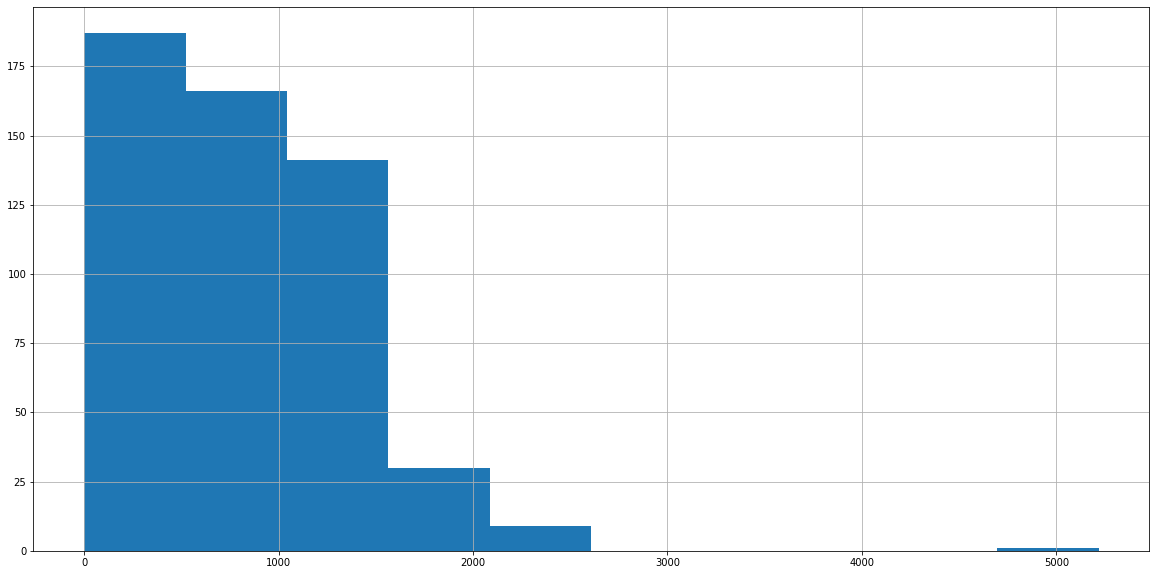

In [ ]:
print(data_ekspor['AELast'].describe())
print(data_ekspor['AELast'].mode())
data_ekspor['AELast'].hist()

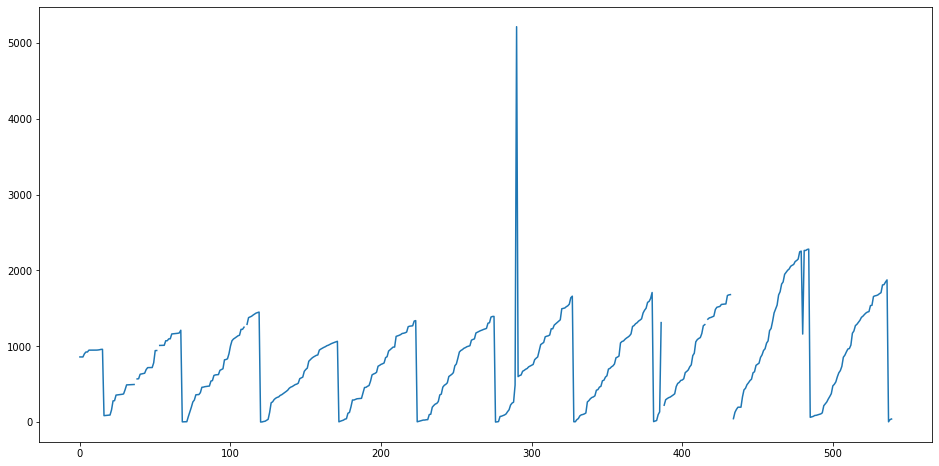

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data_ekspor['AELast'], label='AELast Price')

In [ ]:
data_ekspor['AELast'] = data_ekspor['AELast'].replace(np.nan, 816.4)

In [ ]:
data_ekspor.head()
data_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       587 non-null    datetime64[ns]
 1   UBCurr     534 non-null    float64       
 2   UBLast     534 non-null    float64       
 3   AECurr     533 non-null    float64       
 4   AELast     587 non-null    float64       
 5   TCCurr     534 non-null    float64       
 6   TCLast     534 non-null    float64       
 7   % change   534 non-null    float64       
 8   next year  154 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 41.4 KB


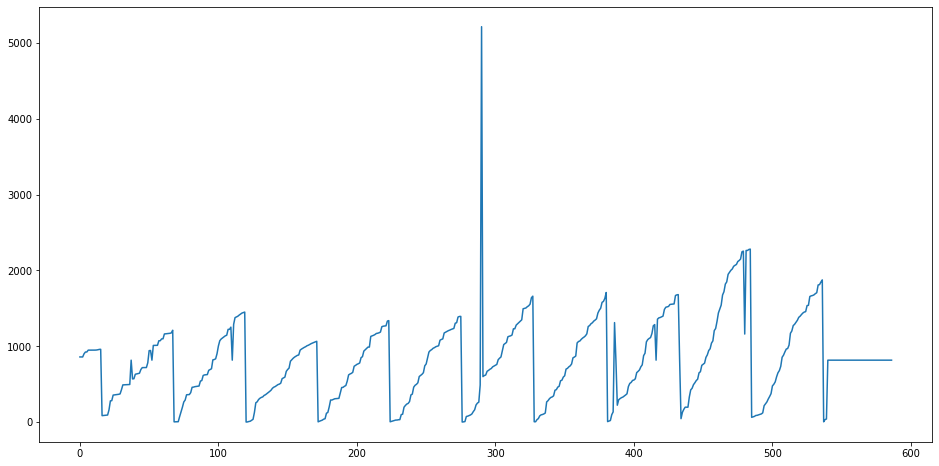

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data_ekspor['AELast'], label='AELast Price')

In [ ]:
print(data_ekspor.isnull().sum())
print(data_ekspor.isnull().sum().sum())

Date           0
UBCurr        53
UBLast        53
AECurr        54
AELast         0
TCCurr        53
TCLast        53
% change      53
next year    433
dtype: int64
752


In [ ]:
data_ekspor.index=data_ekspor['Date']

In [ ]:
data_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587 entries, 2006-05-18 to 2017-08-10
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       587 non-null    datetime64[ns]
 1   UBCurr     534 non-null    float64       
 2   UBLast     534 non-null    float64       
 3   AECurr     533 non-null    float64       
 4   AELast     587 non-null    float64       
 5   TCCurr     534 non-null    float64       
 6   TCLast     534 non-null    float64       
 7   % change   534 non-null    float64       
 8   next year  154 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 45.9 KB


In [ ]:
data_ekspor = data_ekspor.drop(['next year'], axis=1)
data_ekspor = data_ekspor.dropna(axis=0)

In [ ]:
data_ekspor.head()
data_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 533 entries, 2006-05-18 to 2016-09-15
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      533 non-null    datetime64[ns]
 1   UBCurr    533 non-null    float64       
 2   UBLast    533 non-null    float64       
 3   AECurr    533 non-null    float64       
 4   AELast    533 non-null    float64       
 5   TCCurr    533 non-null    float64       
 6   TCLast    533 non-null    float64       
 7   % change  533 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 37.5 KB




---



---



# Pemisahan Data

In [ ]:
data_baru=data_ekspor.iloc[:,4:5].values

In [ ]:
data_baru

array([[8.5880e+02],
       [8.5880e+02],
       [8.5880e+02],
       [9.0080e+02],
       [9.2410e+02],
       [9.2410e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4910e+02],
       [9.5050e+02],
       [9.5370e+02],
       [9.5850e+02],
       [9.5950e+02],
       [8.4200e+01],
       [8.6600e+01],
       [8.9200e+01],
       [9.1100e+01],
       [9.2400e+01],
       [1.6000e+02],
       [2.7890e+02],
       [2.8190e+02],
       [3.5550e+02],
       [3.5810e+02],
       [3.6130e+02],
       [3.6410e+02],
       [3.6600e+02],
       [3.7080e+02],
       [4.2590e+02],
       [4.9000e+02],
       [4.9150e+02],
       [4.9270e+02],
       [4.9320e+02],
       [4.9410e+02],
       [4.9540e+02],
       [5.6880e+02],
       [5.7150e+02],
       [6.3060e+02],
       [6.3460e+02],
       [6.3980e+02],
       [6.4390e+02],
       [6.9250e+02],
       [7.1790e+02],
       [7.1890e+02],
       [7.1890e+02],
       [7.189

In [ ]:
train_data=data_baru[0:495,0]
valid_data=data_baru[495:,0]

In [ ]:
train_data, valid_data

(array([8.5880e+02, 8.5880e+02, 8.5880e+02, 9.0080e+02, 9.2410e+02,
        9.2410e+02, 9.4860e+02, 9.4860e+02, 9.4860e+02, 9.4860e+02,
        9.4860e+02, 9.4910e+02, 9.5050e+02, 9.5370e+02, 9.5850e+02,
        9.5950e+02, 8.4200e+01, 8.6600e+01, 8.9200e+01, 9.1100e+01,
        9.2400e+01, 1.6000e+02, 2.7890e+02, 2.8190e+02, 3.5550e+02,
        3.5810e+02, 3.6130e+02, 3.6410e+02, 3.6600e+02, 3.7080e+02,
        4.2590e+02, 4.9000e+02, 4.9150e+02, 4.9270e+02, 4.9320e+02,
        4.9410e+02, 4.9540e+02, 5.6880e+02, 5.7150e+02, 6.3060e+02,
        6.3460e+02, 6.3980e+02, 6.4390e+02, 6.9250e+02, 7.1790e+02,
        7.1890e+02, 7.1890e+02, 7.1890e+02, 7.8160e+02, 9.4230e+02,
        9.4380e+02, 1.0107e+03, 1.0118e+03, 1.0126e+03, 1.0126e+03,
        1.0725e+03, 1.0728e+03, 1.0972e+03, 1.0982e+03, 1.1621e+03,
        1.1642e+03, 1.1655e+03, 1.1676e+03, 1.1710e+03, 1.1756e+03,
        1.2111e+03, 2.4000e+00, 3.4000e+00, 3.7000e+00, 4.3000e+00,
        7.1700e+01, 1.3280e+02, 1.9480e+02, 2.64

In [ ]:
train_data.shape,valid_data.shape

((495,), (38,))

In [ ]:
train_data=train_data.reshape(-1,1)

In [ ]:
train_data.shape

(495, 1)

In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_data)

In [ ]:
#creating a data structure with 90 timesteps and 1 output
x_train = []
y_train = []

for i in range(90, 495):
  x_train.append(training_set_scaled[i-90:i,0])
  y_train.append(training_set_scaled[i,0])

#converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.16462515, 0.16462515, 0.16462515, ..., 0.11781394, 0.1192133 ,
        0.11959668],
       [0.16462515, 0.16462515, 0.17267621, ..., 0.1192133 , 0.11959668,
        0.1200184 ],
       [0.16462515, 0.17267621, 0.17714264, ..., 0.11959668, 0.1200184 ,
        0.13077233],
       ...,
       [0.16796059, 0.17399889, 0.20277187, ..., 0.05077923, 0.0583319 ,
        0.06475358],
       [0.17399889, 0.20277187, 0.20852263, ..., 0.0583319 , 0.06475358,
        0.07184619],
       [0.20277187, 0.20852263, 0.21147469, ..., 0.06475358, 0.07184619,
        0.09134127]])

In [ ]:
x_train.shape

(405, 90)

In [ ]:
# reshaping dataset
x_train = x_train.reshape(405,90,1)

In [ ]:
x_train.shape

(405, 90, 1)

In [ ]:
y_train

array([1.20018402e-01, 1.30772327e-01, 1.32612571e-01, 1.34740353e-01,
       1.57245002e-01, 1.58126785e-01, 1.59909521e-01, 1.72848736e-01,
       1.92420496e-01, 2.05704756e-01, 2.10056166e-01, 2.12605670e-01,
       2.15500220e-01, 2.18126402e-01, 2.19544923e-01, 2.34420227e-01,
       2.34420227e-01, 2.39998466e-01, 2.47110242e-01, 2.64055821e-01,
       2.65838557e-01, 2.67582955e-01, 2.70554182e-01, 2.72911994e-01,
       2.75595683e-01, 2.76880020e-01, 2.78126018e-01, 0.00000000e+00,
       2.68368892e-04, 1.36101367e-03, 2.07027431e-03, 4.56227117e-03,
       6.86257596e-03, 2.43448924e-02, 4.86514463e-02, 5.11817816e-02,
       5.69517128e-02, 6.01913087e-02, 6.23190906e-02, 6.36034275e-02,
       6.73414227e-02, 6.90858205e-02, 7.18461863e-02, 7.44723676e-02,
       7.74244254e-02, 8.05298369e-02, 8.53988153e-02, 8.81783503e-02,
       8.97502252e-02, 9.22422221e-02, 9.46958805e-02, 9.59035406e-02,
       9.82613530e-02, 1.09686200e-01, 1.11564782e-01, 1.13635057e-01,
      



---


---




# Membangun Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=90, activation='relu', return_sequences=True, input_shape=(90,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=90, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=180, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 90, 90)            33120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 90)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 90, 90)            65160     
_________________________________________________________________
dropout_4 (Dropout)          (None, 90, 90)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 180)               195120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size=64, epochs=50,verbose=2)

Epoch 1/50
7/7 - 6s - loss: 0.0220
Epoch 2/50
7/7 - 3s - loss: 0.0142
Epoch 3/50
7/7 - 3s - loss: 0.0129
Epoch 4/50
7/7 - 3s - loss: 0.0119
Epoch 5/50
7/7 - 3s - loss: 0.0116
Epoch 6/50
7/7 - 3s - loss: 0.0113
Epoch 7/50
7/7 - 3s - loss: 0.0110
Epoch 8/50
7/7 - 3s - loss: 0.0105
Epoch 9/50
7/7 - 3s - loss: 0.0097
Epoch 10/50
7/7 - 3s - loss: 0.0088
Epoch 11/50
7/7 - 3s - loss: 0.0089
Epoch 12/50
7/7 - 3s - loss: 0.0076
Epoch 13/50
7/7 - 3s - loss: 0.0073
Epoch 14/50
7/7 - 3s - loss: 0.0070
Epoch 15/50
7/7 - 3s - loss: 0.0061
Epoch 16/50
7/7 - 3s - loss: 0.0060
Epoch 17/50
7/7 - 3s - loss: 0.0058
Epoch 18/50
7/7 - 3s - loss: 0.0058
Epoch 19/50
7/7 - 3s - loss: 0.0060
Epoch 20/50
7/7 - 3s - loss: 0.0055
Epoch 21/50
7/7 - 3s - loss: 0.0052
Epoch 22/50
7/7 - 3s - loss: 0.0052
Epoch 23/50
7/7 - 3s - loss: 0.0053
Epoch 24/50
7/7 - 3s - loss: 0.0051
Epoch 25/50
7/7 - 3s - loss: 0.0050
Epoch 26/50
7/7 - 3s - loss: 0.0050
Epoch 27/50
7/7 - 3s - loss: 0.0053
Epoch 28/50
7/7 - 3s - loss: 0.0046
E

In [ ]:
valid_data

array([ 529.4,  596.4,  649.9,  678.8,  734.6,  854.8,  882.1,  925.4,
        963.2,  969.8, 1015.2, 1171.4, 1201.3, 1272.1, 1289.7, 1315.4,
       1342.3, 1381.1, 1396.8, 1419.1, 1438.7, 1451.4, 1456.5, 1536.2,
       1540.3, 1656.4, 1665.1, 1669.6, 1678.1, 1694.2, 1706.5, 1808.5,
       1813. , 1847.3, 1875.6,    3.1,   32.6,   40.2])

In [ ]:
valid_data.shape

(38,)

In [ ]:
valid_data = valid_data.reshape(-1,1)

In [ ]:
valid_data

array([[ 529.4],
       [ 596.4],
       [ 649.9],
       [ 678.8],
       [ 734.6],
       [ 854.8],
       [ 882.1],
       [ 925.4],
       [ 963.2],
       [ 969.8],
       [1015.2],
       [1171.4],
       [1201.3],
       [1272.1],
       [1289.7],
       [1315.4],
       [1342.3],
       [1381.1],
       [1396.8],
       [1419.1],
       [1438.7],
       [1451.4],
       [1456.5],
       [1536.2],
       [1540.3],
       [1656.4],
       [1665.1],
       [1669.6],
       [1678.1],
       [1694.2],
       [1706.5],
       [1808.5],
       [1813. ],
       [1847.3],
       [1875.6],
       [   3.1],
       [  32.6],
       [  40.2]])

In [ ]:
# Getting predicted accumulated soybean export at 2016

#concatination
data_total = data_ekspor['AELast']

#stock prices of previous 90 days for each day of 2016
inputs = data_total[len(data_total)-len(valid_data)-90:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

#feature scaling
inputs = sc.transform(inputs)

#creating a test set

x_test = []
for i in range(90,128):
  x_test.append(inputs[i-90:i,0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

# getting predicted stock prices
predicted_accumulated_export = model.predict(x_test)
predicted_accumulated_export = sc.inverse_transform(predicted_accumulated_export)

In [ ]:
predicted_accumulated_export

array([[ 725.1397 ],
       [ 750.75165],
       [ 774.2762 ],
       [ 796.742  ],
       [ 818.99915],
       [ 844.2744 ],
       [ 874.0025 ],
       [ 912.0229 ],
       [ 959.91693],
       [1022.7353 ],
       [1102.3015 ],
       [1191.574  ],
       [1285.1681 ],
       [1377.9667 ],
       [1459.2555 ],
       [1521.2637 ],
       [1558.2269 ],
       [1570.2683 ],
       [1560.0204 ],
       [1535.3204 ],
       [1506.0383 ],
       [1488.8933 ],
       [1504.1411 ],
       [1527.7609 ],
       [1543.1042 ],
       [1553.1725 ],
       [1565.6902 ],
       [1583.7114 ],
       [1601.3372 ],
       [1607.804  ],
       [1579.2399 ],
       [1442.055  ],
       [1032.9915 ],
       [ 530.8434 ],
       [ 287.15045],
       [ 186.4482 ],
       [ 152.35071],
       [ 143.77235]], dtype=float32)

In [ ]:
print(predicted_accumulated_export[5]), print(valid_data[5])

[844.2744]
[854.8]


(None, None)

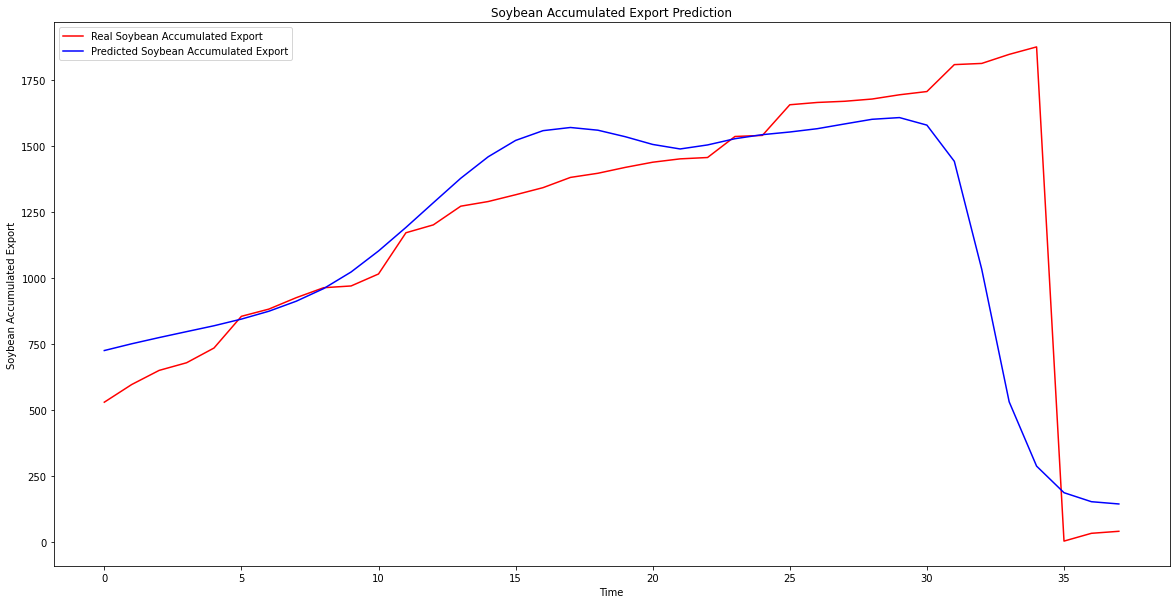

In [ ]:
# Visualising the results
plt.plot(valid_data, color='red', label = 'Real Soybean Accumulated Export')
plt.plot(predicted_accumulated_export, color='blue', label = 'Predicted Soybean Accumulated Export')
plt.title('Soybean Accumulated Export Prediction')
plt.xlabel('Time')
plt.ylabel('Soybean Accumulated Export')
plt.legend()
plt.show()

In [ ]:
data= data_ekspor[['Date','AELast']]

In [ ]:
data.head()

,Date,AELast
Date,,
2006-05-18,2006-05-18,858.8
2006-05-25,2006-05-25,858.8
2006-06-01,2006-06-01,858.8
2006-06-08,2006-06-08,900.8
2006-06-15,2006-06-15,924.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


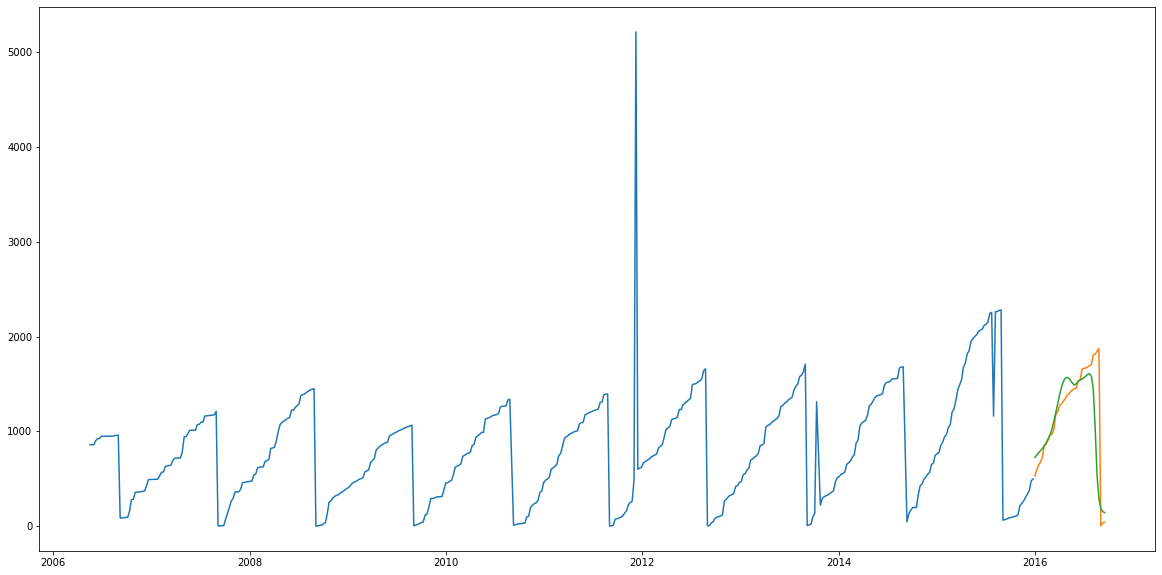

In [ ]:
data_train=data[:495]
data_valid=data_ekspor[495:]
data_valid['Predictions']=predicted_accumulated_export
plt.plot(data_train["AELast"])
plt.plot(data_valid[['AELast',"Predictions"]])



---


---




# Evaluasi Model

In [ ]:
import math
MSE = np.square(np.subtract(valid_data,predicted_accumulated_export)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

378.53930663644354


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(valid_data,predicted_accumulated_export)

143292.00666879944

In [ ]:
print(MSE)

143292.00666879944


In [ ]:
MAPE = np.mean(np.abs((valid_data-predicted_accumulated_export) / valid_data))*100

In [ ]:
MAPE

184.96655243884305



---



---



# Analisis Model & Kesimpulan

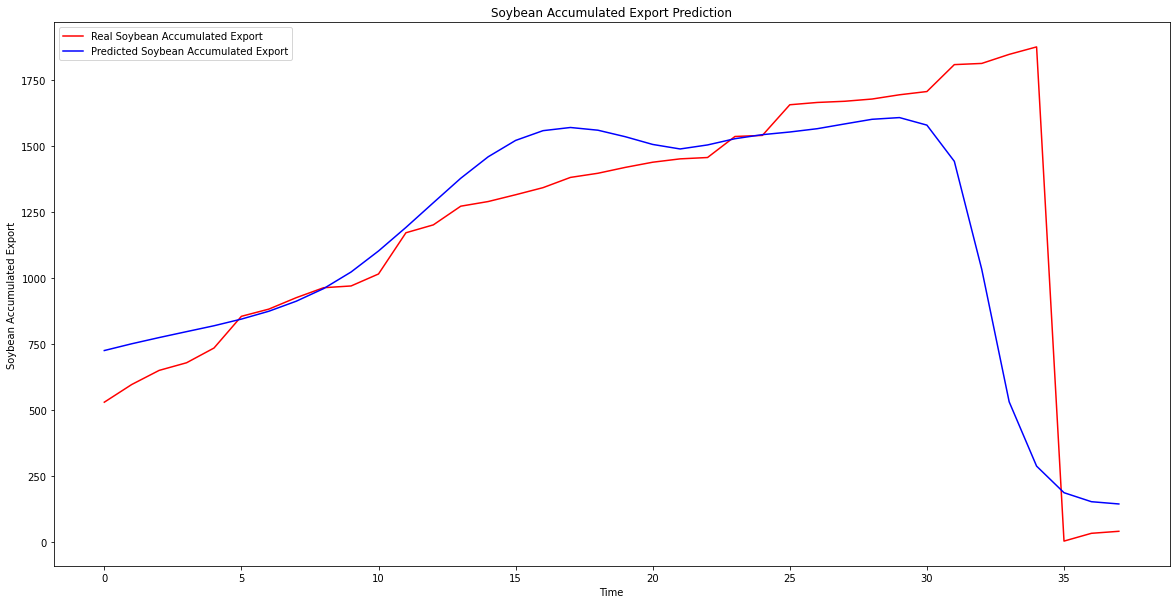

In [ ]:
# Visualising the results
plt.plot(valid_data, color='red', label = 'Real Soybean Accumulated Export')
plt.plot(predicted_accumulated_export, color='blue', label = 'Predicted Soybean Accumulated Export')
plt.title('Soybean Accumulated Export Prediction')
plt.xlabel('Time')
plt.ylabel('Soybean Accumulated Export')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


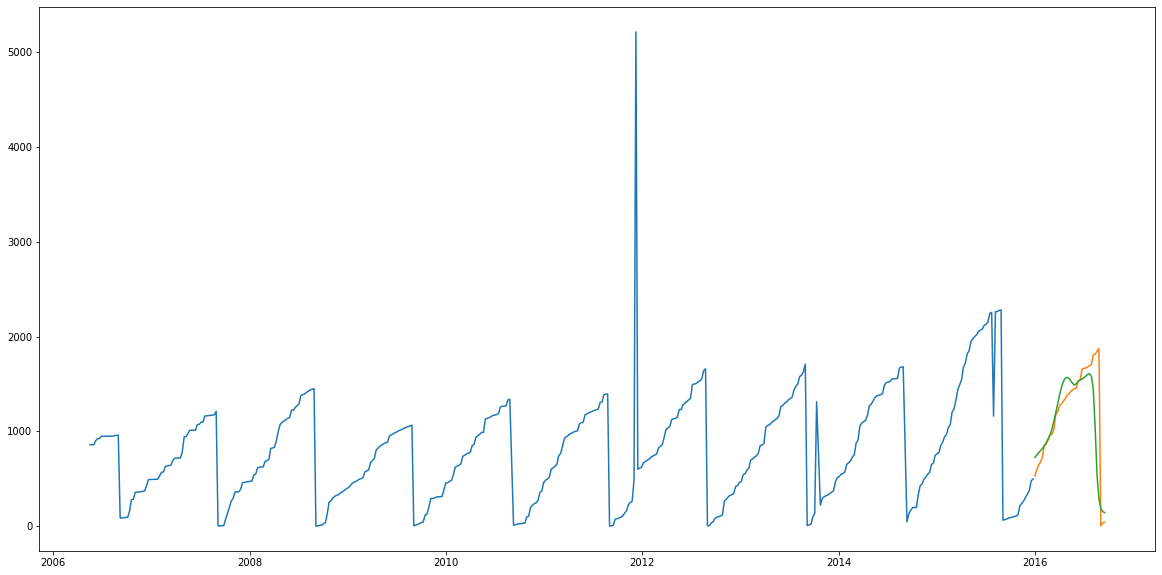

In [ ]:
data_train=data[:495]
data_valid=data_ekspor[495:]
data_valid['Predictions']=predicted_accumulated_export
plt.plot(data_train["AELast"])
plt.plot(data_valid[['AELast',"Predictions"]])

Hasil dari visualisasi data dapat dilihat
bahwa perkembangan laju ekspor kacang
kedelai di Indonesia mengalami peningkatan
yang tidak terlalu signifikan pada setiap
tahunnya dan uniknya pada laju ekspor
terlihat adanya titik waktu dimana nilai ekspor
mengalami penurunan yang lumayan ekstrim.
Hal ini dikarenakan kebutuhan masyarakat
Indonesia terhadap kacang kedelai masih
tinggi. Kemudian untuk beberapa kasus
model LSTM yang sudah didapatkan nilai
prediksinya, didapatkan model dengan jumlah
hidden layer LSTM = 3, batch size = 64, dan
epoch = 50 dengan nilai RSME sebesar 378.53930663644354 dan MAPE 184.96655243884305 atau 48,46%
adalah percobaan model LSTM terbaik dan

visualisasi datanya mendekati dengan nilai
sebenarnya. Meskipun nilai error yang
dihasilkan masih dirasa belum minimum
namun pada visualisasi data prediksi tetap
bisa menggambarkan nilai yang sebenarnya
dimana pada tahun pertama dan seterusnya
mengalami peningkatan namun pada waktu di
pertengahan tahun ada waktu yang
menyebabkan nilai ekspor menurun drastis.